In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\digen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('results.csv', sep=',')

In [3]:
df.head()

,Unnamed: 0,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr,average_train_loss,average_test_loss
0,111,100,0.341349,0.354034,4,32,ReLU(),0.10,0.01,0.877374,0.558875
1,99,100,0.339881,0.332215,4,16,ReLU(),0.10,0.01,0.876788,0.574967
2,102,100,0.337377,0.363232,4,16,LeakyReLU(negative_slope=0.01),0.05,0.01,0.895902,0.594386
3,114,100,0.330233,0.368772,4,32,LeakyReLU(negative_slope=0.01),0.05,0.01,0.871411,0.598012
4,96,100,0.365616,0.375056,4,16,ReLU(),0.05,0.01,0.907693,0.602811


In [91]:
df.sort_values(by = 'val_loss', ascending = True).head(10)#.query('nr_layers == 4 and hidden_layer_size == 32 and dropout == 0.1')
## 99 or 114

# 10^10 cut
# 

,Unnamed: 0,round_epochs,loss,val_loss,nr_layers,hidden_layer_size,activation,dropout,lr,average_train_loss,average_test_loss
1,99,100,0.339881,0.332215,4,16,ReLU(),0.10,0.01,0.876788,0.574967
0,111,100,0.341349,0.354034,4,32,ReLU(),0.10,0.01,0.877374,0.558875
2,102,100,0.337377,0.363232,4,16,LeakyReLU(negative_slope=0.01),0.05,0.01,0.895902,0.594386
3,114,100,0.330233,0.368772,4,32,LeakyReLU(negative_slope=0.01),0.05,0.01,0.871411,0.598012
4,96,100,0.365616,0.375056,4,16,ReLU(),0.05,0.01,0.907693,0.602811
8,108,100,0.400224,0.410014,4,32,ReLU(),0.05,0.01,0.916300,0.641340
7,105,100,0.403243,0.421492,4,16,LeakyReLU(negative_slope=0.01),0.10,0.01,0.942326,0.639238
5,117,100,0.338708,0.445229,4,32,LeakyReLU(negative_slope=0.01),0.10,0.01,0.885598,0.628965
6,126,100,0.354453,0.485543,4,64,LeakyReLU(negative_slope=0.01),0.05,0.01,0.896928,0.638302
9,129,100,0.397254,0.491981,4,64,LeakyReLU(negative_slope=0.01),0.10,0.01,0.935653,0.676684


In [26]:
print('The lowest average test loss ({}) is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df.iloc[0]['average_test_loss'], df.iloc[0]['nr_layers'], 
df.iloc[0]['hidden_layer_size'], df.iloc[0]['activation'],df.iloc[0]['dropout'], df.iloc[0]['lr']) )

The lowest average test loss (0.5588747599767507) is obtained with the following architecture
 nr_layers: 4
 hidden_layer_size: 32
 activation: ReLU()
 dropout: 0.1
 lr: 0.01


In [27]:
print('The highest average test loss ({}) is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df.iloc[-1]['average_test_loss'], df.iloc[-1]['nr_layers'], df.iloc[-1]['hidden_layer_size'],
                                                df.iloc[-1]['activation'],df.iloc[-1]['dropout'], df.iloc[-1]['lr']) )

The highest average test loss (85.85879327252856) is obtained with the following architecture
 nr_layers: 3
 hidden_layer_size: 32
 activation: LeakyReLU(negative_slope=0.01)
 dropout: 0.05
 lr: 0.0001


In [22]:
a2=np.argmin(df['val_loss'])

In [28]:
print('The lowest val loss({}) at epoch 100 is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df.iloc[a2]['val_loss'], df.iloc[a2]['nr_layers'], df.iloc[a2]['hidden_layer_size'],
                                                df.iloc[a2]['activation'],df.iloc[a2]['dropout'], df.iloc[a2]['lr']) )

The lowest val loss(0.3322148578977142) at epoch 100 is obtained with the following architecture
 nr_layers: 4
 hidden_layer_size: 16
 activation: ReLU()
 dropout: 0.1
 lr: 0.01


In [24]:
a3=np.argmax(df['val_loss'])

In [29]:
print('The highest val loss ({}) at epoch 100 is obtained with the following architecture\n nr_layers: {}\n hidden_layer_size: {}\n activation: {}\n dropout: {}\n lr: {}'.format(df.iloc[a3]['val_loss'], df.iloc[a3]['nr_layers'], df.iloc[a3]['hidden_layer_size'],
                                                df.iloc[a3]['activation'],df.iloc[a3]['dropout'], df.iloc[a3]['lr']) )

The highest val loss (85.38967969982701) at epoch 100 is obtained with the following architecture
 nr_layers: 3
 hidden_layer_size: 32
 activation: LeakyReLU(negative_slope=0.01)
 dropout: 0.05
 lr: 0.0001


In [79]:
list1=list(df.index)
list2=list(round(df['val_loss'],3))

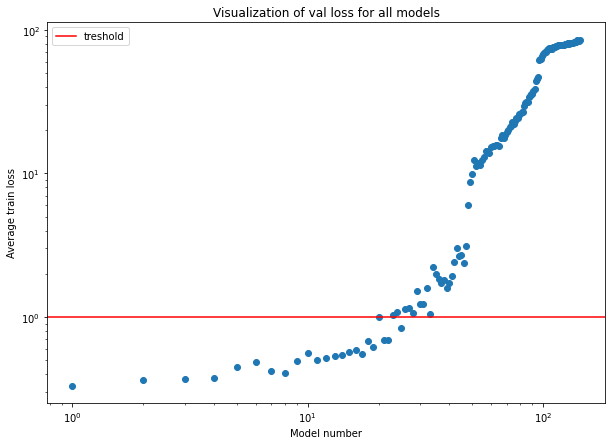

In [81]:
figure = plt.figure(figsize=(10, 7))
plt.axhline(y=1, color='r', label='treshold')
plt.scatter(list1, list2)
plt.ylabel("Average train loss")
plt.xlabel("Model number")
plt.xscale('log')
plt.yscale('log')
plt.title("Visualization of val loss for all models")
plt.legend()
plt.show()

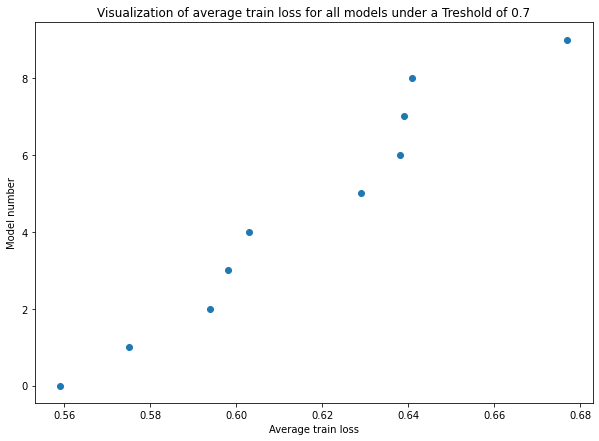

In [65]:
figure = plt.figure(figsize=(10, 7))
plt.scatter(list2[0:10], list1[0:10])
plt.xlabel("Average train loss")
plt.ylabel("Model number")
plt.title("Visualization of average train loss for all models under a Treshold of 0.7")
plt.show()